In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import requests # requests for the report website
import json
from sec_edgar_api import EdgarClient
from bs4 import BeautifulSoup # Import BeautifulSoup
import re # import re module for REGEXes
import time
import os
import codecs
import glob


import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

In [2]:
# 读取Bloomberg overall数据
# Bloom=pd.read_excel('C:/Users/lenovo/Desktop/UCL/Final dissertation/code/Industrial Product.xlsx')

# Bloom['Ticker'] = Bloom['Ticker'].str.replace(r' \b\w{2} Equity\b', '', regex=True)
# display(Bloom)

In [3]:
E=pd.read_excel('C:/Users/lenovo/Desktop/UCL/Final dissertation/code/Industrial product E.xlsx')

E.columns= ["Company", "Ticker", "Bi074", "Country", "2022", "2021", "2020", "2019", "2018", "2017", "2016", "2015"]
# E=E.drop(0).reset_index(drop=True)
E['Ticker'] = E['Ticker'].str.replace(r' \b\w{2} Equity\b', '', regex=True)
display(E)

,Company,Ticker,Bi074,Country,2022,2021,2020,2019,2018,2017,2016,2015
0,374Water Inc,SCWO,Factory Machinery & Equipment,United States,0.05,0.05,NaN,NaN,NaN,NaN,NaN,NaN
1,3M Co,MMM,Diversified Industrials,United States,6.66,6.81,6.70,3.68,3.57,3.15,2.89,2.59
2,A O Smith Corp,AOS,Electrical Equipment,United States,1.54,1.44,1.33,1.36,1.68,0.91,0.00,0.00
3,AAON Inc,AAON,Electrical Equipment,United States,2.94,2.63,NaN,NaN,NaN,NaN,NaN,NaN
4,AAR Corp,AIR,Aircraft & Parts,United States,3.10,2.96,1.41,0.21,0.21,0.21,0.21,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...
253,Xometry Inc,XMTR,Industrial Intermediate Prod,United States,0.08,0.08,NaN,NaN,NaN,NaN,NaN,NaN
254,Xylem Inc/NY,XYL,Factory Machinery & Equipment,United States,5.52,4.86,6.48,6.53,6.50,2.89,2.37,2.32
255,Zurn Elkay Water Solutions Corp,ZWS,Factory Machinery & Equipment,United States,3.75,3.43,1.60,0.96,0.88,0.78,0.00,0.00
256,nLight Inc,LASR,Electrical Equipment,United States,0.54,0.54,1.06,0.00,0.00,NaN,NaN,NaN


In [5]:
G=pd.read_excel('C:/Users/lenovo/Desktop/UCL/Final dissertation/code/Industrial product G.xlsx')

G.columns= ["Company", "Ticker", "Bi074", "Country", "2022", "2021", "2020", "2019", "2018", "2017", "2016", "2015"]
G=G.drop(0).reset_index(drop=True)
G['Ticker'] = G['Ticker'].str.replace(r' \b\w{2} Equity\b', '', regex=True)
display(G)

,Company,Ticker,Bi074,Country,2022,2021,2020,2019,2018,2017,2016,2015
0,374Water Inc,SCWO,Factory Machinery & Equipment,United States,NaN,2.632418,NaN,NaN,NaN,NaN,NaN,NaN
1,3M Co,MMM,Diversified Industrials,United States,8.00217,7.993604,8.112792,8.002011,7.900124,7.781385,7.585672,7.520737
2,A O Smith Corp,AOS,Electrical Equipment,United States,NaN,6.613235,6.346608,6.30689,6.1312,6.281687,6.37969,6.235738
3,AAON Inc,AAON,Electrical Equipment,United States,NaN,6.787126,NaN,NaN,NaN,NaN,NaN,NaN
4,AAR Corp,AIR,Aircraft & Parts,United States,5.434615,5.914832,5.730412,5.917675,5.467046,4.722184,4.643887,4.842847
...,...,...,...,...,...,...,...,...,...,...,...,...
253,Xometry Inc,XMTR,Industrial Intermediate Prod,United States,6.225984,5.968869,NaN,NaN,NaN,NaN,NaN,NaN
254,Xylem Inc/NY,XYL,Factory Machinery & Equipment,United States,8.029804,8.075591,8.047979,7.7784,7.690302,7.877466,7.508317,7.750833
255,Zurn Elkay Water Solutions Corp,ZWS,Factory Machinery & Equipment,United States,6.341065,5.187466,6.392272,7.07384,6.258485,6.022016,5.946976,6.19743
256,nLight Inc,LASR,Electrical Equipment,United States,NaN,5.57473,6.062181,4.8657,4.728465,NaN,NaN,NaN


In [6]:
S=pd.read_excel('C:/Users/lenovo/Desktop/UCL/Final dissertation/code/Industrial product S.xlsx')

S.columns= ["Company", "Ticker", "Bi074", "Country", "2022", "2021", "2020", "2019", "2018", "2017", "2016", "2015"]
# S=S.drop(0).reset_index(drop=True)
S['Ticker'] = S['Ticker'].str.replace(r' \b\w{2} Equity\b', '', regex=True)
display(S)

,Company,Ticker,Bi074,Country,2022,2021,2020,2019,2018,2017,2016,2015
0,374Water Inc,SCWO,Factory Machinery & Equipment,United States,0.16,0.16,NaN,NaN,NaN,NaN,NaN,NaN
1,3M Co,MMM,Diversified Industrials,United States,4.19,4.30,4.89,4.90,4.71,4.67,4.43,4.89
2,A O Smith Corp,AOS,Electrical Equipment,United States,1.73,2.72,2.72,2.72,1.73,1.73,1.73,0.86
3,AAON Inc,AAON,Electrical Equipment,United States,2.72,2.72,NaN,NaN,NaN,NaN,NaN,NaN
4,AAR Corp,AIR,Aircraft & Parts,United States,1.60,1.60,1.47,1.26,0.63,0.63,0.63,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...
253,Xometry Inc,XMTR,Industrial Intermediate Prod,United States,0.47,0.20,NaN,NaN,NaN,NaN,NaN,NaN
254,Xylem Inc/NY,XYL,Factory Machinery & Equipment,United States,4.61,4.23,4.26,3.08,2.62,1.84,1.79,1.72
255,Zurn Elkay Water Solutions Corp,ZWS,Factory Machinery & Equipment,United States,5.37,5.44,4.22,1.81,1.22,1.15,1.19,1.00
256,nLight Inc,LASR,Electrical Equipment,United States,2.72,2.72,2.72,2.72,1.69,NaN,NaN,NaN


In [10]:
# 读取Bloomberg overall数据
Bloom=pd.read_excel('C:/Users/lenovo/Desktop/UCL/Final dissertation/code/ESG Industrial product.xlsx')

Bloom.columns= ["Company", "Ticker", "Bi074", "Country", "2022", "2021", "2020", "2019", "2018", "2017", "2016", "2015"]
# Bloom=Bloom.drop(0).reset_index(drop=True)
Bloom['Ticker'] = Bloom['Ticker'].str.replace(r' \b\w{2} Equity\b', '', regex=True)
display(Bloom)

,Company,Ticker,Bi074,Country,2022,2021,2020,2019,2018,2017,2016,2015
0,374Water Inc,SCWO,Factory Machinery & Equipment,United States,1.14,0.7,NaN,NaN,NaN,NaN,NaN,NaN
1,3M Co,MMM,Diversified Industrials,United States,6.19,6.28,6.51,5.4,5.27,5.05,4.81,4.82
2,A O Smith Corp,AOS,Electrical Equipment,United States,2.81,3.13,3.01,3.02,2.81,2.45,1.93,1.61
3,AAON Inc,AAON,Electrical Equipment,United States,3.89,3.75,NaN,NaN,NaN,NaN,NaN,NaN
4,AAR Corp,AIR,Aircraft & Parts,United States,3.06,3.13,2.51,1.96,1.57,1.43,1.41,1.45
...,...,...,...,...,...,...,...,...,...,...,...,...
253,Xometry Inc,XMTR,Industrial Intermediate Prod,United States,1.51,1.36,NaN,NaN,#N/A Field Not Applicable,#N/A Field Not Applicable,#N/A Field Not Applicable,#N/A Field Not Applicable
254,Xylem Inc/NY,XYL,Factory Machinery & Equipment,United States,5.94,5.54,6.2,5.72,5.5,3.79,3.45,3.46
255,Zurn Elkay Water Solutions Corp,ZWS,Factory Machinery & Equipment,United States,4.96,4.52,3.61,2.67,2.25,2.13,1.67,1.65
256,nLight Inc,LASR,Electrical Equipment,United States,2.4,2.4,2.8,1.91,1.59,NaN,NaN,NaN


In [8]:
def extract_details_from_filename(filename,path):
    filename = filename.replace(f'{path}\\','')
    print(filename)
    parts = filename.replace('.csv', '').split('-')
    CompanyTicker = parts[0]
    Year = int(float(parts[1]))  # Convert to float first, then to int to handle any decimal points
    # print(CompanyTicker)
    # print(Year)
    return CompanyTicker, Year

In [4]:
'''# Folder路径
folder_path = 'C:/Users/lenovo/Desktop/UCL/Final dissertation/code/filtered data'
# Use glob to get all .csv files in the folder
csv_files = glob.glob(f'{folder_path}/*.csv')
ESGOverallData = pd.DataFrame(columns=['CompanyTicker','Year','CSV.Length','ESGData','BloombergOverall'])'''

In [5]:
'''# Main loop to process all CSV files
for filename in csv_files:
    try:
        # Extract company ticker and year from the filename
        CompanyTicker, Year = extract_details_from_filename(filename, folder_path)
        
        # Read the CSV file into a DataFrame
        ESGData = pd.read_csv(filename)
        # display(ESGData)
        # Initialize an empty list to store ESG scores for each row
        CSVRowESG = []
        
        # Iterate over each row in the DataFrame
        for index, row in ESGData.iterrows():
            # Extract ESG scores and append to the list
            ESGN = [row['Env'], row['Soc'], row['Gov'], row['None']]
            CSVRowESG.append(ESGN)
        
        # Filter Bloomberg data for the current company ticker
        TickerBloom = Bloom[Bloom['Ticker'] == CompanyTicker]
        # print(TickerBloom)
        
        # Extract the overall ESG score for the current year
        TickerBloomOverall = TickerBloom[Year].values[0]
        
        # Print the overall ESG score
        # print(TickerBloomOverall)
        
        # Append the data to the ESGOverallData DataFrame
        ESGOverallData.loc[len(ESGOverallData)] = [CompanyTicker, Year,len(ESGData), CSVRowESG, TickerBloomOverall]
        
    except Exception as e:
        # Print error message if there is an issue reading the file
        print(f"{CompanyTicker}-{Year}读取文件时发生错误: {e}")
        
        # Set the overall ESG score to 0 in case of an error
        ESGOverallData.loc[len(ESGOverallData)] = [CompanyTicker, Year,len(ESGData), CSVRowESG, 0]
        


display(ESGOverallData)'''

'# Main loop to process all CSV files\nfor filename in csv_files:\n    try:\n        # Extract company ticker and year from the filename\n        CompanyTicker, Year = extract_details_from_filename(filename, folder_path)\n        \n        # Read the CSV file into a DataFrame\n        ESGData = pd.read_csv(filename)\n        # display(ESGData)\n        # Initialize an empty list to store ESG scores for each row\n        CSVRowESG = []\n        \n        # Iterate over each row in the DataFrame\n        for index, row in ESGData.iterrows():\n            # Extract ESG scores and append to the list\n            ESGN = [row[\'Env\'], row[\'Soc\'], row[\'Gov\'], row[\'None\']]\n            CSVRowESG.append(ESGN)\n        \n        # Filter Bloomberg data for the current company ticker\n        TickerBloom = Bloom[Bloom[\'Ticker\'] == CompanyTicker]\n        # print(TickerBloom)\n        \n        # Extract the overall ESG score for the current year\n        TickerBloomOverall = TickerBloom[

In [2]:
ESGOverallData = pd.read_csv('C:/Users/lenovo/Desktop/UCL/Final dissertation/code/Midway Results/ESGOverallData.csv')
display(ESGOverallData)

,CompanyTicker,Year,CSV.Length,ESGData,ESGLabel,BloombergOverall
0,AGCO,2015,1051,"[[0.0117305135354399, 0.0153213972225785, 0.01...","['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', ...",2.02
1,AGCO,2016,63,"[[0.0058001060970127, 0.0085885049775242, 0.00...","['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', ...",1.92
2,AGCO,2017,65,"[[0.0058001060970127, 0.0085885049775242, 0.00...","['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', ...",1.98
3,AGCO,2018,62,"[[0.0058001060970127, 0.0085885049775242, 0.00...","['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', ...",1.76
4,AGCO,2019,62,"[[0.0058001060970127, 0.0085885049775242, 0.00...","['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', ...",1.96
...,...,...,...,...,...,...
549,WWD,2018,815,"[[0.0021063769236207, 0.0025376905687153, 0.00...","['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', ...",2.69
550,WWD,2019,1602,"[[0.0020806740503758, 0.0032837667968124, 0.00...","['N', 'E', 'N', 'N', 'E', 'E', 'E', 'N', 'N', ...",2.70
551,WWD,2020,1642,"[[0.0020806740503758, 0.0032837667968124, 0.00...","['N', 'E', 'N', 'N', 'E', 'E', 'E', 'N', 'N', ...",3.32
552,WWD,2021,1076,"[[0.0020806740503758, 0.0032837667968124, 0.00...","['N', 'E', 'N', 'N', 'E', 'E', 'E', 'N', 'N', ...",2.67


C:\Users\lenovo\AppData\Local\Temp\ipykernel_12580\3064620881.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.7, 1])  # Adjust layout to accommodate the table


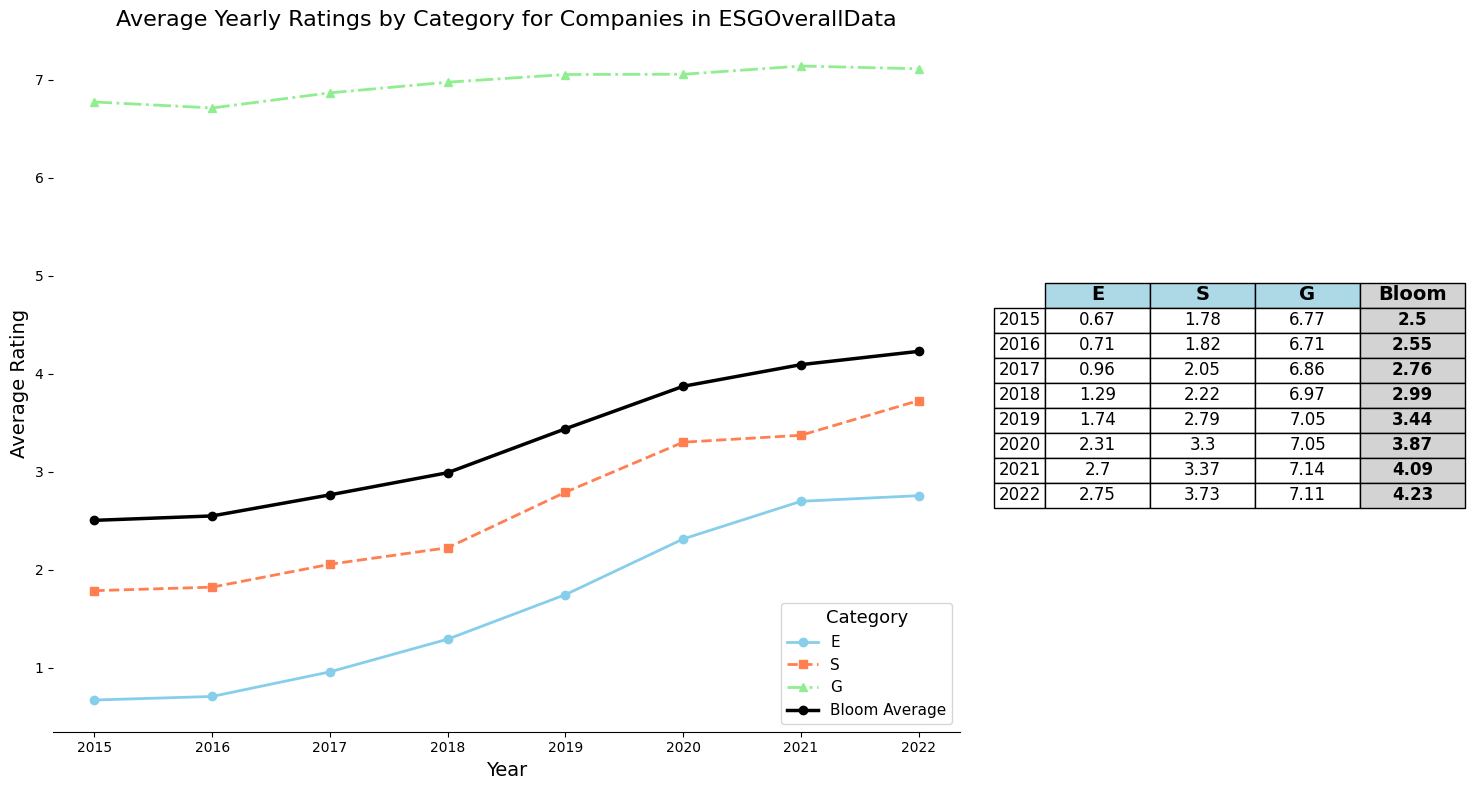

In [21]:
def clean_and_convert_to_numeric(df, years):
    return df[years].apply(pd.to_numeric, errors='coerce')

# Define the years to analyze
years = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

# Apply cleaning function to E, S, G, and Bloom DataFrames
E[years] = clean_and_convert_to_numeric(E, years)
S[years] = clean_and_convert_to_numeric(S, years)
G[years] = clean_and_convert_to_numeric(G, years)
Bloom[years] = clean_and_convert_to_numeric(Bloom, years)

companies_to_plot = ESGOverallData['CompanyTicker'].unique()
E_filtered = E[E['Ticker'].isin(companies_to_plot)]
S_filtered = S[S['Ticker'].isin(companies_to_plot)]
G_filtered = G[G['Ticker'].isin(companies_to_plot)]
Bloom_filtered = Bloom[Bloom['Ticker'].isin(companies_to_plot)]

e_avg = E_filtered[years].mean(skipna=True)
s_avg = S_filtered[years].mean(skipna=True)
g_avg = G_filtered[years].mean(skipna=True)
bloom_avg = Bloom_filtered[years].mean(skipna=True)

df_combined = pd.DataFrame({
    'Year': years,
    'E': e_avg,
    'S': s_avg,
    'G': g_avg
}).set_index('Year')


table_data = df_combined.copy()
table_data['Bloom'] = bloom_avg
table_data = table_data.round(2)

fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(years, e_avg, marker='o', linestyle='-', color='skyblue', linewidth=2, label='E')
ax.plot(years, s_avg, marker='s', linestyle='--', color='coral', linewidth=2, label='S')
ax.plot(years, g_avg, marker='^', linestyle='-.', color='lightgreen', linewidth=2, label='G')

# Line plot for Bloom average
ax.plot(years, bloom_avg, marker='o', linestyle='-', color='black', linewidth=2.5, label='Bloom Average')

# Adding a custom table using matplotlib's Table
ax_table = fig.add_axes([0.8, 0.15, 0.2, 0.7])  # Adjust size to match plot height
ax_table.axis('off')

# Create a table
table = ax_table.table(cellText=table_data.values,
                       colLabels=table_data.columns,
                       rowLabels=table_data.index,
                       cellLoc='center', loc='center')

# Formatting the table for better aesthetics
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5)

# Add colors to headers and Bloom column for differentiation
for key, cell in table.get_celld().items():
    if key[0] == 0:  # Header row
        cell.set_fontsize(14)
        cell.set_facecolor('lightblue')
        cell.set_text_props(weight='bold')
    if key[1] == 3:  # Bloom column
        cell.set_facecolor('lightgrey')
        cell.set_text_props(weight='bold')

# Title and labels
ax.set_title('Average Yearly Ratings by Category for Companies in ESGOverallData', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Average Rating', fontsize=14)
ax.legend(title='Category', title_fontsize='13', fontsize='11')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
sns.despine(left=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout(rect=[0, 0, 0.7, 1])  # Adjust layout to accommodate the table

plt.show()

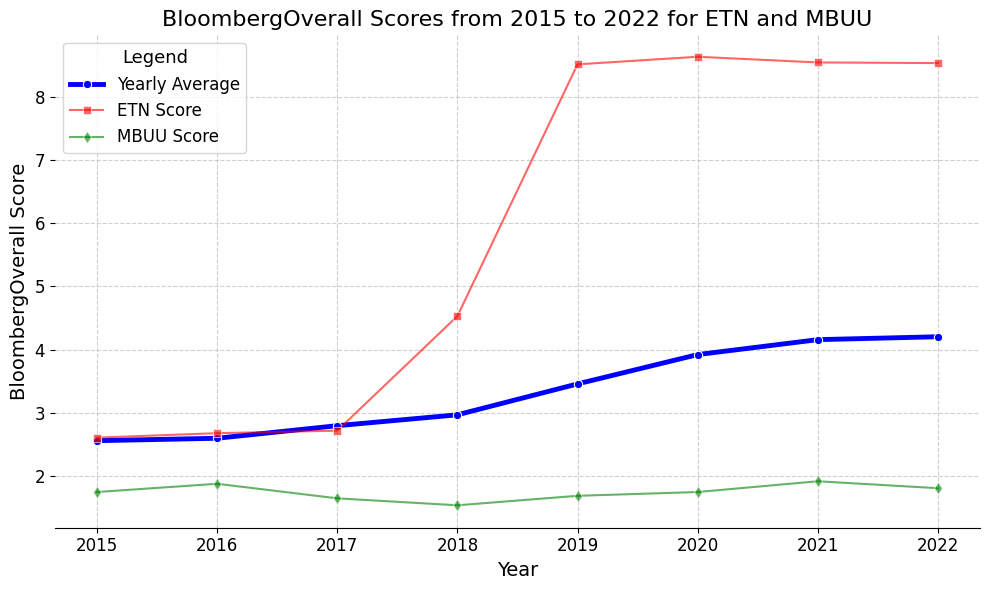

In [15]:
# Step 1: Calculate the average BloombergOverall score for each company across all years
company_avg_scores = ESGOverallData.groupby('CompanyTicker')['BloombergOverall'].mean().reset_index()

# Step 2: Identify the company with the highest and lowest average scores
top_company = company_avg_scores.loc[company_avg_scores['BloombergOverall'].idxmax()]['CompanyTicker']
bottom_company = company_avg_scores.loc[company_avg_scores['BloombergOverall'].idxmin()]['CompanyTicker']

# Step 3: Extract the scores for those companies each year
top_company_scores = ESGOverallData[ESGOverallData['CompanyTicker'] == top_company].groupby('Year')['BloombergOverall'].mean().reset_index()
bottom_company_scores = ESGOverallData[ESGOverallData['CompanyTicker'] == bottom_company].groupby('Year')['BloombergOverall'].mean().reset_index()

# Calculate the yearly average for comparison
yearly_avg = ESGOverallData.groupby('Year')['BloombergOverall'].mean().reset_index()

# Step 4: Plot the scores using seaborn for better visual emphasis
plt.figure(figsize=(10, 6))

# Plot the average line with a thicker width and solid style
sns.lineplot(x=yearly_avg['Year'], y=yearly_avg['BloombergOverall'], 
             marker='o', color='b', label='Yearly Average', 
             linewidth=3.5, linestyle='-', alpha=1.0)

# Plot the top and bottom company lines with lower opacity and thinner lines
sns.lineplot(x=top_company_scores['Year'], y=top_company_scores['BloombergOverall'], 
             marker='s', color='r', label=f'{top_company} Score', 
             linewidth=1.5, linestyle='-', alpha=0.6)

sns.lineplot(x=bottom_company_scores['Year'], y=bottom_company_scores['BloombergOverall'], 
             marker='d', color='g', label=f'{bottom_company} Score', 
             linewidth=1.5, linestyle='-', alpha=0.6)

# Add title and labels
plt.title(f'BloombergOverall Scores from 2015 to 2022 for {top_company} and {bottom_company}', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('BloombergOverall Score', fontsize=14)
plt.xticks(yearly_avg['Year'], fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Legend', fontsize=12, title_fontsize='13')
sns.despine(left=True)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [29]:
avg_csv_length = ESGOverallData.groupby('CompanyTicker')['CSV.Length'].mean().reset_index()
top_10_companies = avg_csv_length.nlargest(10, 'CSV.Length')

overall_avg_csv_length = ESGOverallData['CSV.Length'].mean()

overall_avg_row = pd.DataFrame({'CompanyTicker': ['Overall Average'], 'CSV.Length': [overall_avg_csv_length]})
top_10_companies = pd.concat([top_10_companies, overall_avg_row])

In [30]:
avg_csv_length = ESGOverallData.groupby('CompanyTicker')['CSV.Length'].mean().reset_index()
top_10_companies = avg_csv_length.nlargest(10, 'CSV.Length')


top_10_company_data = ESGOverallData[ESGOverallData['CompanyTicker'].isin(top_10_companies['CompanyTicker'])]
yearly_avg_bloomberg = top_10_company_data.groupby(['Year', 'CompanyTicker'])['BloombergOverall'].mean().reset_index()



overall_avg_csv_length = ESGOverallData['CSV.Length'].mean()

overall_avg_row = pd.DataFrame({'CompanyTicker': ['Overall Average'], 'CSV.Length': [overall_avg_csv_length]})
top_10_companies = pd.concat([top_10_companies, overall_avg_row])

print("Top 10 companies by average CSV.Length:")
print(top_10_companies)
print("Yearly average BloombergOverall for top 10 companies:")
print(yearly_avg_bloomberg)

Top 10 companies by average CSV.Length:
      CompanyTicker   CSV.Length
44              LMT  1473.625000
59              PII  1316.875000
73              TKR  1182.000000
81              WWD  1155.000000
33               IR  1089.200000
67               ST  1039.625000
66             SPXC  1005.625000
74             TRMB   934.400000
13              CAT   907.000000
56              OSK   874.750000
0   Overall Average   518.207581
Yearly average BloombergOverall for top 10 companies:
    Year CompanyTicker  BloombergOverall
0   2015           CAT              3.65
1   2015           LMT              3.38
2   2015           OSK              4.02
3   2015           PII              3.10
4   2015          SPXC              2.03
..   ...           ...               ...
66  2022           PII              4.39
67  2022          SPXC              6.23
68  2022            ST              6.20
69  2022           TKR              3.46
70  2022           WWD              2.67

[71 rows x 3 colu

In [ ]:
# plt.figure(figsize=(10, 6))
# palette = sns.color_palette("Blues_d", len(top_10_companies) - 1) + [(1, 0.4, 0.4)]  # Set last color to be distinct
# sns.barplot(x=top_10_companies['CompanyTicker'], y=top_10_companies['CSV.Length'], palette=palette)
# plt.title('Top 10 Companies by Average CSV Length with Overall Average', fontsize=16)
# plt.xlabel('Company Ticker', fontsize=14)
# plt.ylabel('Average CSV Length', fontsize=14)
# plt.xticks(rotation=45, ha='right', fontsize=12)
# plt.yticks(fontsize=12)
# sns.despine(left=True)
# plt.tight_layout()
# plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_22736\652290298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x=top_10_companies['CompanyTicker'], y=top_10_companies['CSV.Length'], palette=palette)


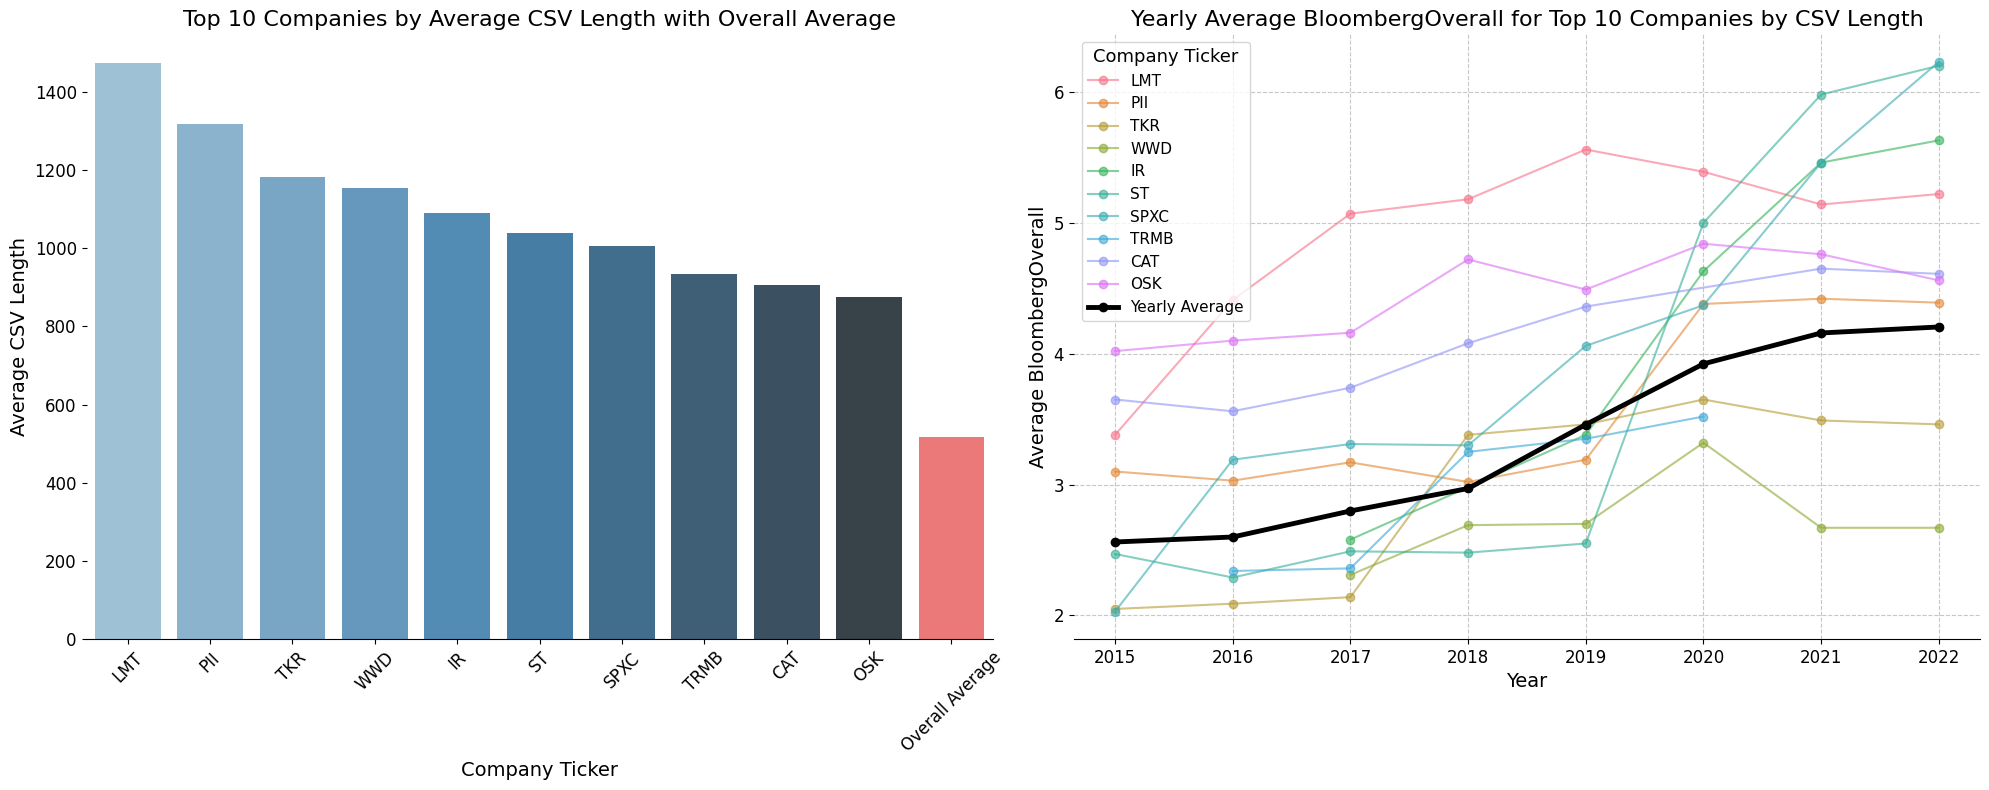

In [31]:
# Step 1: Plot the bar chart of the top 10 companies by average CSV length with overall average
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Bar chart
palette = sns.color_palette("Blues_d", len(top_10_companies) - 1) + [(1, 0.4, 0.4)]  
sns.barplot(ax=axes[0], x=top_10_companies['CompanyTicker'], y=top_10_companies['CSV.Length'], palette=palette)
axes[0].set_title('Top 10 Companies by Average CSV Length with Overall Average', fontsize=16)
axes[0].set_xlabel('Company Ticker', fontsize=14)
axes[0].set_ylabel('Average CSV Length', fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
sns.despine(ax=axes[0], left=True)

# Step 2: Plot the yearly average BloombergOverall for these top 10 companies
palette = sns.color_palette("husl", len(top_10_companies['CompanyTicker']))

# Line plot
for i, company in enumerate(top_10_companies['CompanyTicker']):
    company_data = yearly_avg_bloomberg[yearly_avg_bloomberg['CompanyTicker'] == company]
    if not company_data.empty:
        axes[1].plot(company_data['Year'], company_data['BloombergOverall'], 
                     marker='o', linestyle='-', color=palette[i], 
                     linewidth=1.5, alpha=0.6, label=company)

# Emphasize the overall average line
axes[1].plot(yearly_avg['Year'], yearly_avg['BloombergOverall'], 
             marker='o', linestyle='-', color='black', 
             linewidth=3.5, alpha=1.0, label='Yearly Average')

axes[1].set_title('Yearly Average BloombergOverall for Top 10 Companies by CSV Length', fontsize=16)
axes[1].set_xlabel('Year', fontsize=14)
axes[1].set_ylabel('Average BloombergOverall', fontsize=14)
axes[1].set_xticks(yearly_avg_bloomberg['Year'].unique())
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
axes[1].legend(title='Company Ticker', title_fontsize='13', fontsize='11')
sns.despine(ax=axes[1], left=True)
axes[1].grid(True, linestyle='--', alpha=0.7)

# Adjust layout for better fit
plt.tight_layout()
plt.show()

In [32]:
print(ESGOverallData[ESGOverallData['CompanyTicker'] == 'ETN']['CSV.Length'])

144     38
145    132
146    129
147    131
148    125
149    147
150    173
151    183
Name: CSV.Length, dtype: int64


In [9]:
'''
folder_path = 'C:/Users/lenovo/Desktop/UCL/Final dissertation/code/testing'
# Use glob to get all .csv files in the folder
csv_files = glob.glob(f'{folder_path}/*.csv')
ESGOverallData = pd.DataFrame(columns=['CompanyTicker','Year','CSV.Length','ESGData','BloombergOverall'])'''

In [24]:
'''# Assuming csv_files, folder_path, and Bloom are already defined
representation_results = []
ESGOverallData = pd.DataFrame(columns=['CompanyTicker', 'Year', 'NumRows', 'CSVRowESG', 'OverallESG'])

# Main loop to process all CSV files
for filename in csv_files:
    try:
        # Extract company ticker and year from the filename
        CompanyTicker, Year = extract_details_from_filename(filename, folder_path)
        
        # Read the CSV file into a DataFrame
        ESGData = pd.read_csv(os.path.join(folder_path, filename))
        
        # Initialize an empty list to store ESG scores and categories for each row
        CSVRowESG = []
        
        # Iterate over each row in the DataFrame
        for index, row in ESGData.iterrows():
            # Extract ESG scores
            ESGN = [row['Env'], row['Soc'], row['Gov'], row['None']]
            
            # Calculate the maximum category and value
            max_value = max(ESGN)
            max_category = ['Env', 'Soc', 'Gov', 'None'][ESGN.index(max_value)]
            
            # Store the ESG scores and corresponding max category in a tuple
            CSVRowESG.append((ESGN, max_category))
            
            # Append the results to the representation list
            representation_results.append({
                'CompanyTicker': CompanyTicker,
                'Year': Year,
                # 'Sentence': row['Sentences'],
                'Category': max_category,
                # 'Max Value': max_value
            })
        
        # Filter Bloomberg data for the current company ticker
        TickerBloom = Bloom[Bloom['Ticker'] == CompanyTicker]
        
        # Extract the overall ESG score for the current year
        TickerBloomOverall = TickerBloom[Year].values[0]
        
        # Append the data to the ESGOverallData DataFrame
        ESGOverallData.loc[len(ESGOverallData)] = [CompanyTicker, Year, len(ESGData), CSVRowESG, TickerBloomOverall]
        
    except Exception as e:
        # Print error message if there is an issue reading the file
        print(f"{CompanyTicker}-{Year}读取文件时发生错误: {e}")
        
        # Set the overall ESG score to 0 in case of an error
        ESGOverallData.loc[len(ESGOverallData)] = [CompanyTicker, Year, len(ESGData), CSVRowESG, 0]

# Create DataFrame from representation results
representation_df = pd.DataFrame(representation_results)

# Display the combined results
display(representation_df)
display(ESGOverallData)'''


'# Assuming csv_files, folder_path, and Bloom are already defined\nrepresentation_results = []\nESGOverallData = pd.DataFrame(columns=[\'CompanyTicker\', \'Year\', \'NumRows\', \'CSVRowESG\', \'OverallESG\'])\n\n# Main loop to process all CSV files\nfor filename in csv_files:\n    try:\n        # Extract company ticker and year from the filename\n        CompanyTicker, Year = extract_details_from_filename(filename, folder_path)\n        \n        # Read the CSV file into a DataFrame\n        ESGData = pd.read_csv(os.path.join(folder_path, filename))\n        \n        # Initialize an empty list to store ESG scores and categories for each row\n        CSVRowESG = []\n        \n        # Iterate over each row in the DataFrame\n        for index, row in ESGData.iterrows():\n            # Extract ESG scores\n            ESGN = [row[\'Env\'], row[\'Soc\'], row[\'Gov\'], row[\'None\']]\n            \n            # Calculate the maximum category and value\n            max_value = max(ESGN)\n 

In [25]:
print(ESGOverallData.columns)

Index(['CompanyTicker', 'Year', 'CSV.Length', 'ESGData', 'ESGLabel',
       'BloombergOverall'],
      dtype='object')


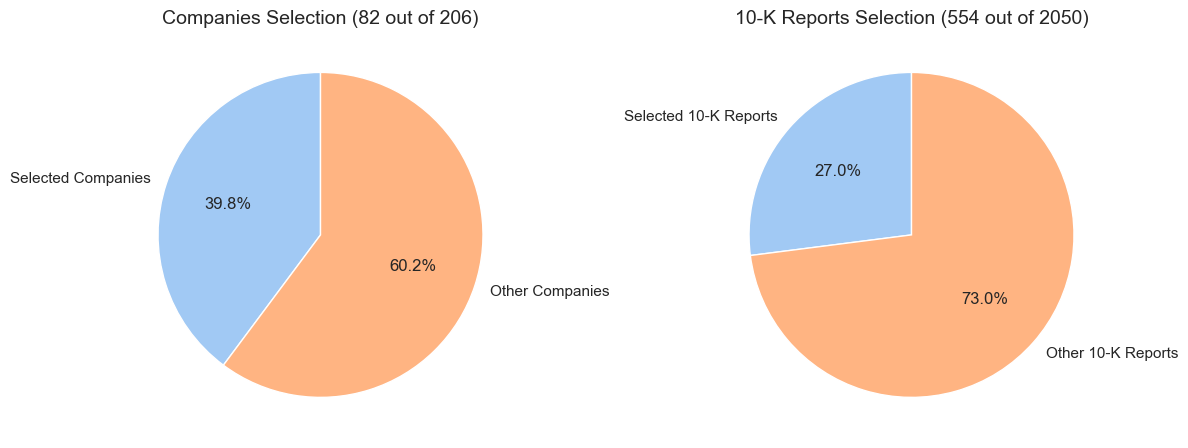

In [19]:
# Data for the pie charts
data1 = [82, 206 - 82]
data2 = [554, 2050 - 554]

# Labels for the pie charts
labels1 = ['Selected Companies', 'Other Companies']
labels2 = ['Selected 10-K Reports', 'Other 10-K Reports']

# Create a 2x1 subplot matrix
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# First pie chart
axs[0].pie(data1, labels=labels1, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
axs[0].set_title('Companies Selection (82 out of 206)', fontsize=14)

# Second pie chart
axs[1].pie(data2, labels=labels2, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
axs[1].set_title('10-K Reports Selection (554 out of 2050)', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

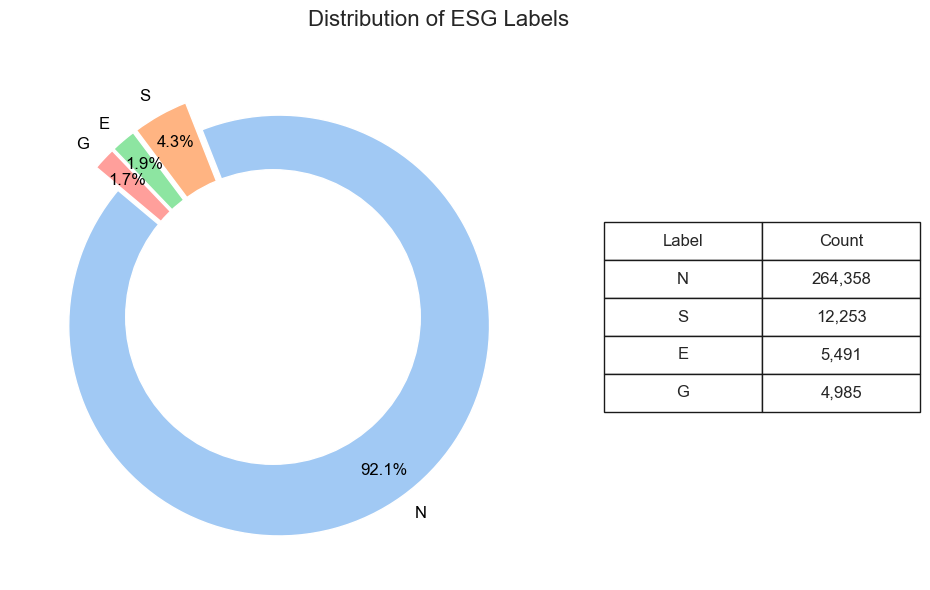

In [14]:
# Data from the user's input
label_counts = pd.Series({
    'N': 264358,
    'S': 12253,
    'E': 5491,
    'G': 4985
})

# Define the explode parameter to separate the slices
explode = (0.05, 0.1, 0.1, 0.1)

# Set up the figure with GridSpec for pie chart and table
fig = plt.figure(figsize=(10, 6))
gs = GridSpec(1, 2, width_ratios=[2, 1])

# Create the pie chart
ax1 = fig.add_subplot(gs[0])
wedges, texts, autotexts = ax1.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', 
                                   explode=explode, colors=sns.color_palette('pastel'), 
                                   startangle=140, pctdistance=0.85)

# Adjust the labels and percentage annotations
for text in texts + autotexts:
    text.set_fontsize(12)
    text.set_color('black')

# Draw a circle at the center of the pie chart to make it look like a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax1.add_artist(centre_circle)

# Create the table
ax2 = fig.add_subplot(gs[1])
ax2.axis('off')  # Turn off the axis

# Create a table with the label counts
table_data = [[label, f'{count:,}'] for label, count in label_counts.items()]
table = ax2.table(cellText=table_data, colLabels=["Label", "Count"], cellLoc="center", loc="center")

# Format the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)

# Add a title and improve layout
plt.suptitle('Distribution of ESG Labels', fontsize=16)
plt.tight_layout()
plt.show()

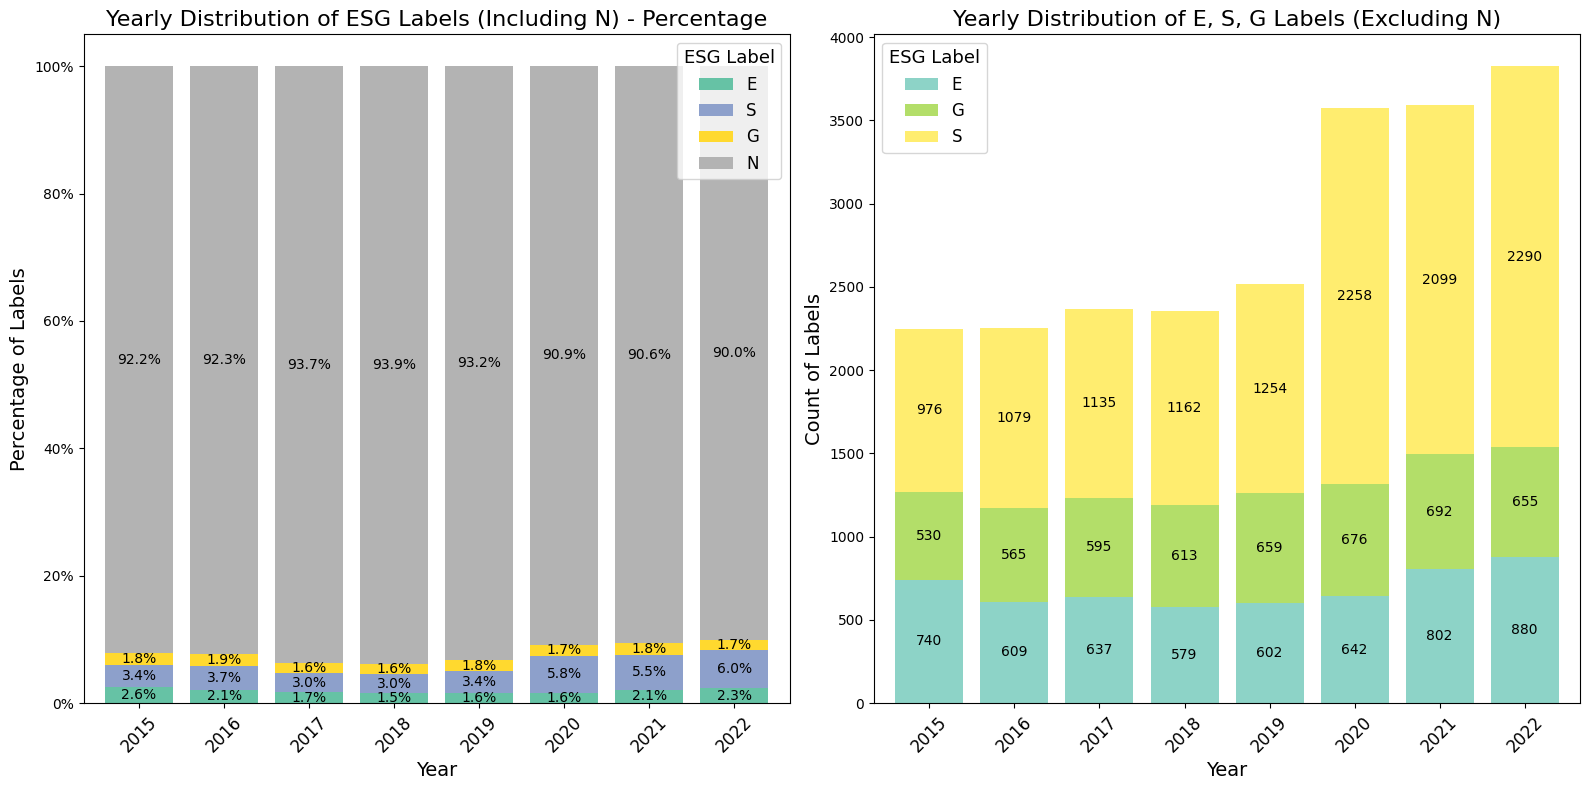

In [10]:
# Step 1: Filter out only 'E', 'S', 'G', and 'N' labels for the left plot and keep only 'E', 'S', 'G' for the right plot
ESGOverallData['FilteredESGLabel'] = ESGOverallData['ESGLabel'].apply(lambda x: [label.strip() for label in x if label.strip() in ['E', 'S', 'G']])
ESGOverallData['ESGLabel'] = ESGOverallData['ESGLabel'].apply(lambda x: [label.strip() for label in x if label.strip() in ['E', 'S', 'G', 'N']])

# Step 2: Flatten the ESGLabel column into a new DataFrame where each label is a separate row
exploded_data_all = ESGOverallData.explode('ESGLabel')
exploded_data_filtered = ESGOverallData.explode('FilteredESGLabel')

# Step 3: Count the occurrences of each label per year
label_counts_by_year_all = exploded_data_all.groupby(['Year', 'ESGLabel']).size().unstack(fill_value=0)
label_counts_by_year_filtered = exploded_data_filtered.groupby(['Year', 'FilteredESGLabel']).size().unstack(fill_value=0)

# Step 4: Normalize the counts to get percentages for the plot with all labels
label_counts_by_year_all_pct = label_counts_by_year_all.div(label_counts_by_year_all.sum(axis=1), axis=0) * 100

# Reorder the columns for the left plot to display as E, S, G, N
label_counts_by_year_all_pct = label_counts_by_year_all_pct[['E', 'S', 'G', 'N']]

# Step 5: Create a 1x2 subplot matrix
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Left plot: Including 'N', using percentages with reordered columns
label_counts_by_year_all_pct.plot(kind='bar', stacked=True, colormap='Set2', width=0.8, ax=axes[0])
axes[0].set_title('Yearly Distribution of ESG Labels (Including N) - Percentage', fontsize=16)
axes[0].set_xlabel('Year', fontsize=14)
axes[0].set_ylabel('Percentage of Labels', fontsize=14)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, fontsize=12)
axes[0].legend(title='ESG Label', fontsize=12, title_fontsize='13')
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}%'))

# Right plot: Excluding 'N'
label_counts_by_year_filtered.plot(kind='bar', stacked=True, colormap='Set3', width=0.8, ax=axes[1])
axes[1].set_title('Yearly Distribution of E, S, G Labels (Excluding N)', fontsize=16)
axes[1].set_xlabel('Year', fontsize=14)
axes[1].set_ylabel('Count of Labels', fontsize=14)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, fontsize=12)
axes[1].legend(title='ESG Label', fontsize=12, title_fontsize='13')

# Step 6: Annotate each bar with the count or percentage
for ax in axes:
    for container in ax.containers:
        ax.bar_label(container, label_type='center', fmt='%d' if ax == axes[1] else '%.1f%%', fontsize=10)

plt.tight_layout()
plt.show()

In [23]:
etn_data = ESGOverallData[ESGOverallData['CompanyTicker'] == 'ETN'].copy()
etn_data['FilteredESGLabel'] = etn_data['ESGLabel'].apply(lambda x: [label.strip() for label in x if label.strip() in ['E', 'S', 'G']])
etn_data['ESGLabel'] = etn_data['ESGLabel'].apply(lambda x: [label.strip() for label in x if label.strip() in ['E', 'S', 'G', 'N']])

In [24]:
# Step 2: Flatten the ESGLabel column for ETN data
exploded_etn_all = etn_data.explode('ESGLabel')
exploded_etn_filtered = etn_data.explode('FilteredESGLabel')

# Step 3: Count occurrences of each label per year
label_counts_etn_all = exploded_etn_all.groupby(['Year', 'ESGLabel']).size().unstack(fill_value=0)
label_counts_etn_filtered = exploded_etn_filtered.groupby(['Year', 'FilteredESGLabel']).size().unstack(fill_value=0)

# Step 4: Normalize counts for the plot with all labels to get percentages
label_counts_etn_all_pct = label_counts_etn_all.div(label_counts_etn_all.sum(axis=1), axis=0) * 100

# Reorder columns for the left plot to display as E, S, G, N
label_counts_etn_all_pct = label_counts_etn_all_pct[['E', 'S', 'G', 'N']]


In [39]:
years = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

# Step 1: Filter the data for ETN ticker
etn_E = E[E['Ticker'] == 'ETN'][years]
etn_S = S[S['Ticker'] == 'ETN'][years]
etn_G = G[G['Ticker'] == 'ETN'][years]
etn_Bloom = Bloom[Bloom['Ticker'] == 'ETN'][years]

# Step 2: Calculate the yearly averages for E, S, G, Bloom
etn_scores = pd.DataFrame({
    'Year': years,
    'E': etn_E.mean(),
    'S': etn_S.mean(),
    'G': etn_G.mean(),
    'Bloom': etn_Bloom.mean()
}).set_index('Year')

# Assuming ESG content data is similar to the one provided earlier, adjust as needed
# etn_scores['E_Content'] = etn_E.count(axis=1)
# etn_scores['S_Content'] = etn_S.count(axis=1)
# etn_scores['G_Content'] = etn_G.count(axis=1)



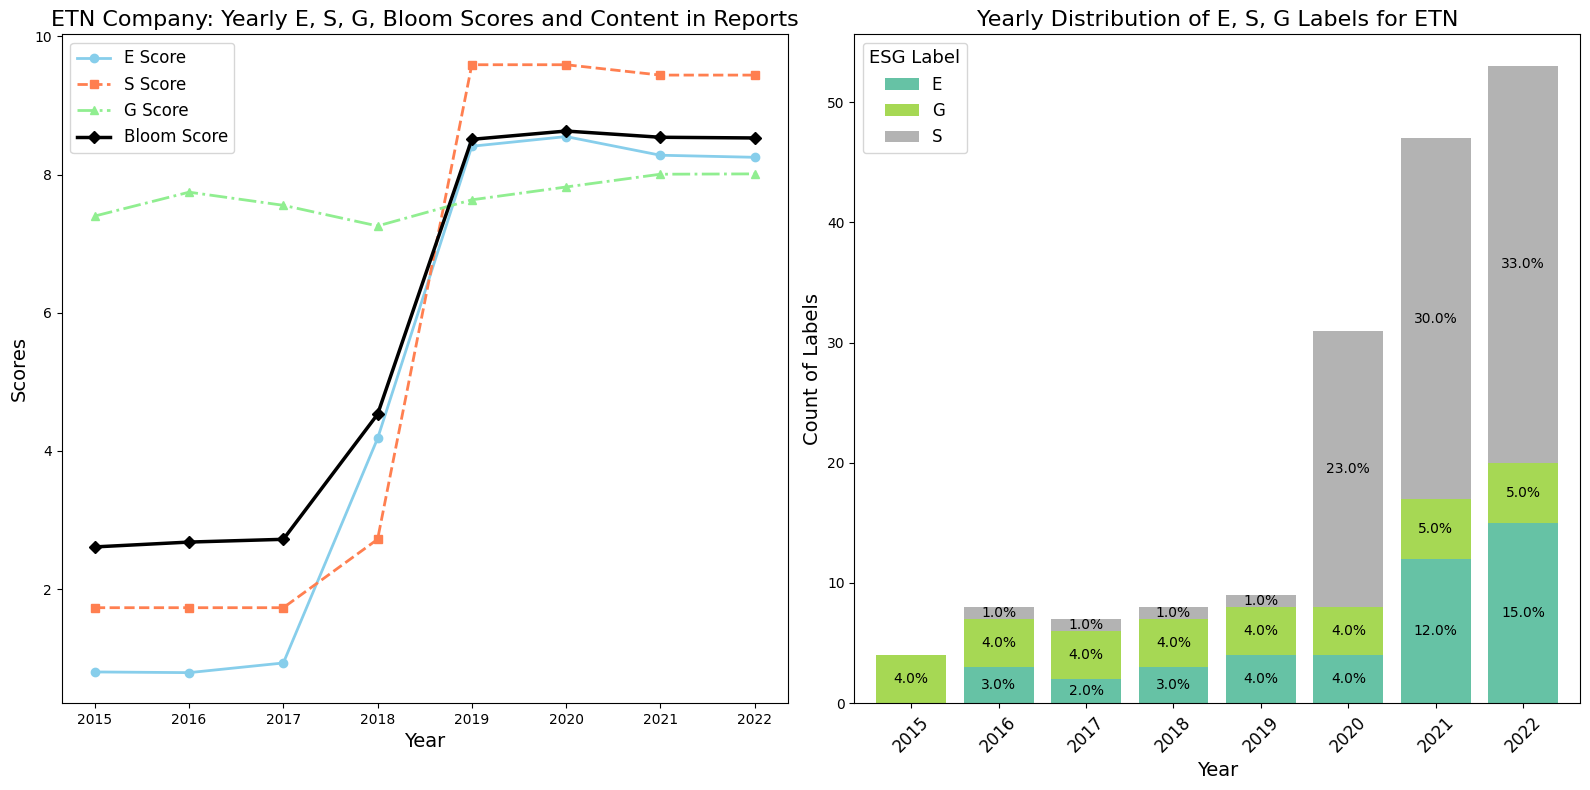

In [41]:
# Step 3: Create a 1x2 subplot matrix for combined plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Plotting E, S, G, Bloom scores as line plots on the first subplot
ax1.plot(etn_scores.index, etn_scores['E'], marker='o', linestyle='-', color='skyblue', linewidth=2, label='E Score')
ax1.plot(etn_scores.index, etn_scores['S'], marker='s', linestyle='--', color='coral', linewidth=2, label='S Score')
ax1.plot(etn_scores.index, etn_scores['G'], marker='^', linestyle='-.', color='lightgreen', linewidth=2, label='G Score')
ax1.plot(etn_scores.index, etn_scores['Bloom'], marker='D', linestyle='-', color='black', linewidth=2.5, label='Bloom Score')

# Adding secondary y-axis for E, S, G content in reports on the first subplot
# ax1_bar = ax1.twinx()
# ax1_bar.bar(etn_scores.index, etn_scores['E_Content'], alpha=0.3, color='skyblue', label='E Content')
# ax1_bar.bar(etn_scores.index, etn_scores['S_Content'], alpha=0.3, color='coral', bottom=etn_scores['E_Content'], label='S Content')
# ax1_bar.bar(etn_scores.index, etn_scores['G_Content'], alpha=0.3, color='lightgreen', bottom=etn_scores['E_Content'] + etn_scores['S_Content'], label='G Content')

# Labels, title, and legends for the first plot
ax1.set_title('ETN Company: Yearly E, S, G, Bloom Scores and Content in Reports', fontsize=16)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Scores', fontsize=14)
# ax1_bar.set_ylabel('Content Count in Reports', fontsize=14)
ax1.legend(loc='upper left', fontsize=12)
# ax1_bar.legend(loc='upper right', fontsize=12)
ax1.set_xticks(range(len(etn_scores.index)))
ax1.set_xticklabels(etn_scores.index)

# Second plot: Distribution of E, S, G Labels for ETN
label_counts_etn_filtered.plot(kind='bar', stacked=True, colormap='Set2', width=0.8, ax=ax2)
ax2.set_title('Yearly Distribution of E, S, G Labels for ETN', fontsize=16)
ax2.set_xlabel('Year', fontsize=14)
ax2.set_ylabel('Count of Labels', fontsize=14)
ax2.set_xticks(range(len(etn_scores.index)))
ax2.set_xticklabels(etn_scores.index, rotation=45, fontsize=12)
ax2.legend(title='ESG Label', fontsize=12, title_fontsize='13')

# Annotate each bar with the percentage on the second plot
for container in ax2.containers:
    labels = [f'{h:.1f}%' if h > 0 else '' for h in container.datavalues]
    ax2.bar_label(container, labels=labels, label_type='center', fontsize=10)


plt.tight_layout()
plt.show()